In [1]:
## # Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing and Reading Data File

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/Jadhavrasika/Phishing-Website/refs/heads/main/dataset_phishing.csv')

In [5]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [7]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [8]:
## Checking for duplicates

In [9]:

df.duplicated().sum()

0

In [10]:
## Identifing constant Features

In [11]:

un_data={col:len(df[col].unique()) for col in df.columns}

In [12]:
## Removing Constant Features

In [13]:

for col, val in un_data.items():
  if val==1:
    df.drop(col, axis=1,inplace=True)

In [14]:
from urllib.parse import urlparse, parse_qs

In [15]:
import socket

In [16]:

# Function to extract features
def extract_url_features(url):
    parsed = urlparse(url)
    # Feature extraction
    features = {
        'scheme': parsed.scheme,
        'netloc': parsed.netloc,
        'path': parsed.path,
        'url_length': len(url),
        'num_path_segments': len([seg for seg in parsed.path.split('/') if seg]),
        'num_query_params': len(parse_qs(parsed.query)),
    }
    # Check if domain is an IP address
    try:
        socket.inet_aton(parsed.netloc)
        features['is_ip'] = 1
    except Exception:
        features['is_ip'] = 0
    return features

# Apply extraction function
features_df = df['url'].apply(extract_url_features).apply(pd.Series)
df = pd.concat([df, features_df], axis=1)
df = df.drop('url', axis=1)

In [17]:
## Checking for outliers

In [18]:


# IQR outlier detection function
def find_outliers_IQR(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example usage (replace 'url_length' with your desired column)
outliers_url_length = find_outliers_IQR(df, 'url_length')
outliers_url_length


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,google_index,page_rank,status,scheme,netloc,path,url_length,num_path_segments,num_query_params,is_ip
29,163,14,1,4,9,1,0,2,1,0,...,1,0,phishing,http,www.inbioma.pe,/rechnung-376440790464490488&amp,163,1,0,0
45,131,27,0,2,1,0,1,0,1,4,...,1,4,phishing,https,grassform-my.sharepoint.com,/:b:/g/personal/accounts_grassform_co_uk/EYsmX...,131,5,1,0
49,159,14,1,2,0,0,1,1,2,0,...,1,0,phishing,http,vaportotal.net,/catalog/language/english/product/special/inde...,159,6,2,0
91,151,10,1,3,1,1,0,0,0,0,...,1,0,phishing,http,hidayat.uz,/928375602332311ochttp3A2F2F2Fws2FISAPIdllFM2M...,151,1,0,0
108,430,13,1,24,0,1,2,9,10,18,...,1,0,phishing,http,98.126.214.77,/ap/signin,430,2,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11365,267,25,0,3,0,0,1,1,2,0,...,1,3,phishing,http,videoslol.webcindario.com,/app/facebook.com/,267,2,2,0
11383,139,17,1,2,0,0,1,4,5,0,...,0,5,phishing,https,onedrive.live.com,/,139,0,5,0
11387,137,19,0,5,3,0,1,1,2,1,...,1,0,phishing,http,eden.it-guys.net.nz,/wp-content/languages/plugins/ugh/Entrar/Login...,137,10,2,0
11404,149,10,1,1,0,0,0,0,0,5,...,1,3,phishing,https,ticonme.es,/Sharep01nt_Access_Drive03/Acrobat_Reader_87yu...,149,4,0,0


In [19]:
## Replacing outliers with median

In [20]:


def replace_outliers_with_median(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    median = df[column].median()

    # Replace outliers with the median
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

# Example usage
df = replace_outliers_with_median(df, 'url_length')


In [21]:
## Calculate VIF

In [22]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'df' is your DataFrame and contains numerical features for VIF calculation
# Select numerical features for VIF calculation. Exclude the target variable
numerical_features = df.select_dtypes(include=np.number).columns

# Create a new DataFrame with only the numerical features
X = df[numerical_features]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif


,Features,VIF
0,length_url,28.532451
1,length_hostname,19.965781
2,ip,4.039454
3,nb_dots,44.634439
4,nb_hyphens,16.627243
...,...,...
80,page_rank,7.227167
81,url_length,17.568929
82,num_path_segments,30.752986
83,num_query_params,16.958219


In [23]:
## Dropping the highest features values

In [24]:


# Drop features with VIF > 10
features_to_drop = vif[vif['VIF'] > 10]['Features']
df = df.drop(features_to_drop, axis=1)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ip                          11430 non-null  int64  
 1   nb_at                       11430 non-null  int64  
 2   nb_qm                       11430 non-null  int64  
 3   nb_underscore               11430 non-null  int64  
 4   nb_tilde                    11430 non-null  int64  
 5   nb_percent                  11430 non-null  int64  
 6   nb_star                     11430 non-null  int64  
 7   nb_comma                    11430 non-null  int64  
 8   nb_semicolumn               11430 non-null  int64  
 9   nb_dollar                   11430 non-null  int64  
 10  nb_space                    11430 non-null  int64  
 11  nb_www                      11430 non-null  int64  
 12  nb_com                      11430 non-null  int64  
 13  nb_dslash                   114

In [26]:
## Importing  and using PCA Concept

In [27]:
from sklearn.decomposition import PCA

In [28]:


# Step 1: Standardize the data
from sklearn.preprocessing import MinMaxScaler,RobustScaler

scaler = RobustScaler()
# Exclude the 'status' column and select only numerical features for scaling
numerical_features = df.drop('status', axis=1).select_dtypes(include=np.number).columns
X_scaled = scaler.fit_transform(df[numerical_features]) 

# Step 2: Determine number of components to retain 90% variance

for i in range(1, len(numerical_features) + 1): # Use the length of numerical features
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['status'], how = 'left')
pca_df

Explained Variance Ratio: [0.35130708 0.60096414 0.6978401  0.75929292 0.80088284 0.83661816
 0.86142942 0.88059585 0.89562282 0.90996802]
Number of components selected: 10


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,status
0,-3.959899,12.408396,-0.882986,-1.318580,-0.149387,-0.438885,-0.241600,0.865689,-1.519412,1.807867,legitimate
1,-1.844433,-2.125562,-1.276570,-1.385124,-0.746845,0.626827,-0.348316,-0.955883,1.280883,0.446586,phishing
2,13.641617,0.004531,-0.913675,-0.682511,-0.678066,0.186475,-0.068431,-1.492227,0.433414,0.546824,phishing
3,-2.651727,5.172499,-0.851119,-1.084220,1.451658,-0.606601,0.241105,-0.560520,-0.805387,-0.174678,legitimate
4,-2.136820,-1.442585,-0.525055,-0.433147,0.946364,-0.201963,0.151043,2.840812,0.613537,0.630530,legitimate
...,...,...,...,...,...,...,...,...,...,...,...
11425,-2.788280,2.889063,-0.267491,0.327858,1.080384,0.470870,-0.216714,0.894781,1.464771,-1.215482,legitimate
11426,-1.898944,-2.135298,-1.315410,-0.927862,-0.760661,0.065132,0.793592,-0.670368,-0.481748,-0.631336,phishing
11427,-2.418408,-2.342337,4.694069,5.453077,-2.440977,0.322507,-0.582174,-1.129555,-0.251677,0.537777,legitimate
11428,4.282892,0.214055,0.542358,-0.904093,-0.156467,-0.762183,0.144145,2.378327,0.623985,-1.297147,legitimate


In [29]:
## Conerting Status Result into Binary values

In [30]:
# Assuming 'pca_df' is your DataFrame and 'status' is the column to convert
# Map 'legitimate' to 0 and 'phishing' to 1
status_mapping = {'legitimate': 0, 'phishing': 1}
pca_df['status'] = pca_df['status'].map(status_mapping)

In [31]:
## Visualizing Correlation

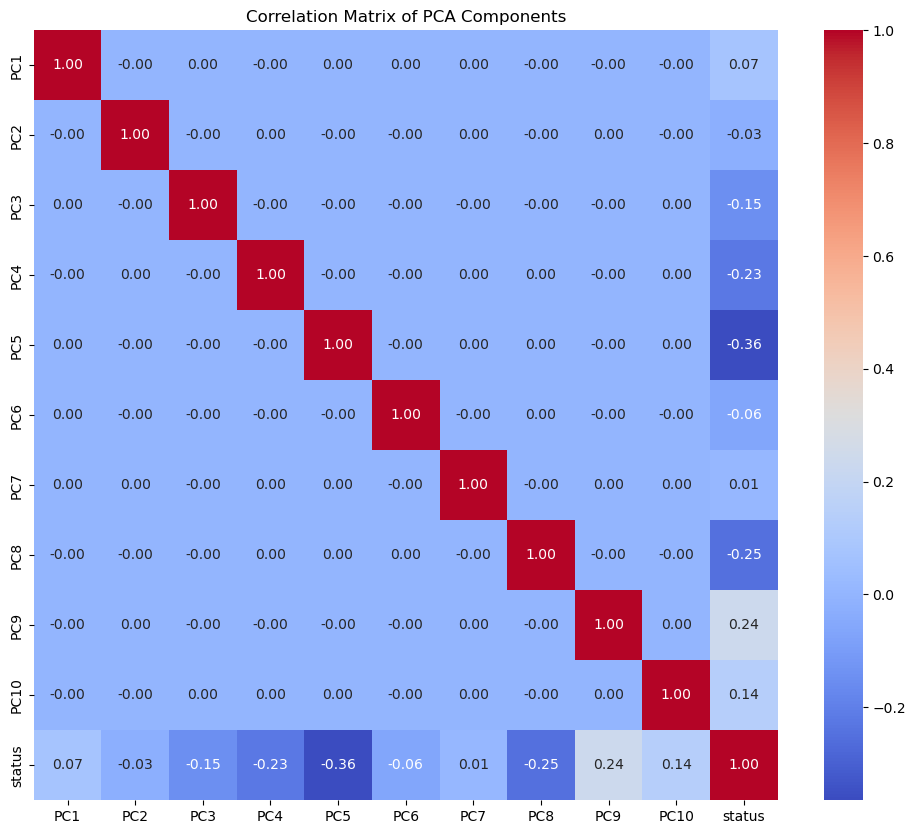

In [32]:
# prompt: now please give heatmap fot this pca

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming pca_df is already created as in the previous code

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pca_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of PCA Components')
plt.show()


In [33]:
## Model Building

In [34]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import accuracy_score, classification_report


def train_and_test_split(data, tcol, testSize=0.3, randomState=3):
    X = data.drop(tcol,axis=1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testSize,random_state=randomState)

def model_builder(model_name, model, data, t_col):
    X_train,X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    result = [model_name, accuracy]
    return result


model_builder(model_name='RandomForestClassifier',model=RandomForestClassifier(),data=pca_df,t_col='status')


['RandomForestClassifier', 0.8970545348498105]

In [35]:
# prompt: now apply k fold with  folds

# Assuming pca_df is your DataFrame with the 'status' column as the target variable
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
# Define the number of folds for k-fold cross-validation
folds =10  # You can change this to any desired number of folds

# Initialize KFold
kf = KFold(n_splits=folds, shuffle=True, random_state=42) #Setting a random state for reproducibility

# Initialize the model (example: RandomForestClassifier)
model = RandomForestClassifier()

# Perform k-fold cross-validation
results = cross_val_score(model, pca_df.drop('status', axis=1), pca_df['status'], cv=kf)

# Print the results
print("Cross-validation scores:", results)
print("Average cross-validation score:", results.mean())


Cross-validation scores: [0.90726159 0.89588801 0.9063867  0.90551181 0.91076115 0.90201225
 0.89851269 0.91076115 0.88451444 0.89938758]
Average cross-validation score: 0.9020997375328083


In [36]:
# prompt: now apply hypertuning on this model

# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # Setting random state for reproducibility


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


# Fit the grid search to the data
grid_search.fit(pca_df.drop('status', axis=1), pca_df['status'])

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(pca_df.drop('status', axis=1), pca_df['status'])

# Evaluate the model on the test data (if you have a separate test set)
# ... (your evaluation code here)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.9039370078740158


RandomForestClassifier(n_estimators=200, random_state=42)

In [37]:
# prompt: give me pickle file code for this file

import pickle

# Assuming 'best_rf_model' is your trained model from the previous code

# Save the model to a pickle file
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

# Load the model from the pickle file (example)
with open('best_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the 'loaded_model' to make predictions
# Example:
# predictions = loaded_model.predict(new_data)


In [38]:
# streamlit_app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from urllib.parse import urlparse, parse_qs
import socket
# Import necessary sklearn components even if loaded from pickle for type hints etc.
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")

# --- Feature Extraction (Simplified version from notebook) ---
# IMPORTANT: This function is INSUFFICIENT for the full pipeline.
# You need a function that calculates ALL features remaining after VIF removal.
def extract_url_features_simple(url):
    """
    Extracts basic features from a URL as done in the notebook.
    THIS IS A PLACEHOLDER - FULL FEATURE EXTRACTION NEEDED.
    """
    try:
        parsed = urlparse(url)
        features = {
            'scheme': parsed.scheme,
            'netloc': parsed.netloc,
            'path': parsed.path,
            'url_length': len(url), # Note: Notebook had 'length_url' separately
            'num_path_segments': len([seg for seg in parsed.path.split('/') if seg]),
            'num_query_params': len(parse_qs(parsed.query)),
        }
        # Check if domain is an IP address
        try:
            socket.inet_aton(parsed.netloc)
            features['is_ip'] = 1
        except Exception:
            features['is_ip'] = 0
        return features
    except Exception as e:
        st.error(f"Error parsing URL: {e}")
        return None

# --- Placeholder for Full Feature Extraction ---
# You would replace extract_url_features_simple with this comprehensive function
def extract_all_features(url):
    """
    Placeholder function for extracting ALL required features.
    This needs to replicate the feature engineering that created
    the original dataset_phishing.csv for the relevant columns.
    """
    st.warning("Using placeholder feature extraction. Implement full feature extraction for accurate results.")

    # --- !!! IMPLEMENT FULL FEATURE EXTRACTION HERE !!! ---
    # This would involve calculating features like:
    # length_url, length_hostname, ip, nb_dots, nb_hyphens, nb_at, nb_qm,
    # nb_and, nb_eq, nb_underscore, nb_tilde, nb_percent, nb_slash, nb_star,
    # nb_colon, nb_comma, nb_semicolumn, nb_dollar, nb_space, nb_www, nb_com,
    # nb_dslash, http_in_path, https_token, ratio_digits_url, ratio_digits_host,
    # punycode, port, tld_in_path, tld_in_subdomain, abnormal_subdomain,
    # prefix_suffix, random_domain, shortening_service, path_extension,
    # nb_redirection, nb_external_redirection, length_words_raw, char_repeat,
    # shortest_words_raw, shortest_word_host, shortest_word_path, longest_words_raw,
    # longest_word_host, longest_word_path, avg_words_raw, avg_word_host,
    # avg_word_path, phish_hints, domain_in_brand, brand_in_subdomain,
    # brand_in_path, suspecious_tld, statistical_report, nb_hyperlinks,
    # ratio_intHyperlinks, ratio_extHyperlinks, ratio_nullHyperlinks, nb_extCSS,
    # ratio_intRedirection, ratio_extRedirection, ratio_intErrors, ratio_extErrors,
    # login_form, external_favicon, links_in_tags, submit_email, ratio_intMedia,
    # ratio_extMedia, sfh, iframe, popup_window, safe_anchor, onmouseover,
    # right_clic, empty_title, domain_in_title, domain_with_copyright,
    # whois_registered_domain, domain_registration_length, domain_age,
    # web_traffic, dns_record, google_index, page_rank
    # AND the ones from extract_url_features_simple (scheme, netloc, path, url_length etc.)
    # The 'is_ip' feature calculated needs to map correctly to the model's expectation.

    # For demonstration, return a dictionary with placeholder zeros for expected features
    # You MUST replace this with actual feature calculations.
    basic_features = extract_url_features_simple(url)
    if basic_features is None:
        return None

    # Example: You need to know which features remain AFTER VIF removal in your notebook
    # Let's assume these are the numerical features kept (replace with your actual list)
    # This list needs to exactly match what the scaler/pca were fitted on.
    # I'm inferring this from the notebook's VIF section - VERIFY THIS LIST!
    required_numerical_features = [
        'ip', 'nb_at', 'nb_qm', 'nb_underscore', 'nb_tilde', 'nb_percent',
        'nb_star', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www',
        'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
        'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain',
        'abnormal_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service',
        'path_extension', 'nb_redirection', 'nb_external_redirection', 'char_repeat',
        'shortest_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain',
        'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
        'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extRedirection', 'ratio_extErrors',
        'login_form', 'external_favicon', 'links_in_tags', 'ratio_intMedia',
        'ratio_extMedia', 'iframe', 'popup_window', 'safe_anchor', 'onmouseover',
        'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright',
        'whois_registered_domain', 'domain_registration_length', 'domain_age',
        'web_traffic', 'dns_record', 'google_index', 'page_rank', 'is_ip'
        # The 'url_length' from the simple extraction might correspond to 'length_url'
        # but other features like 'length_hostname', 'num_path_segments', 'num_query_params'
        # were likely dropped by VIF or were named differently in the original CSV.
        # You need to be precise about the feature set the scaler expects.
    ]

    all_features = {feat: 0 for feat in required_numerical_features} # Initialize with zeros

    # --- Populate 'all_features' with values calculated from the input 'url' ---
    # Example (very basic - needs full implementation):
    all_features['is_ip'] = basic_features.get('is_ip', 0)
    # Add calculations for all other features...

    return all_features

# --- Load Pre-trained Objects ---
# These files must be generated during your model training phase
@st.cache_resource
def load_model(path="best_rf_model.pkl"):
    try:
        with open(path, 'rb') as file:
            model = pickle.load(file)
        return model
    except FileNotFoundError:
        st.error(f"Model file not found at {path}. Please ensure it's in the same directory or provide the correct path.")
        return None
    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None

@st.cache_resource
def load_scaler(path="scaler.pkl"):
    try:
        with open(path, 'rb') as file:
            scaler = pickle.load(file)
        return scaler
    except FileNotFoundError:
        st.error(f"Scaler file not found at {path}. Please generate and save the fitted scaler during training.")
        return None
    except Exception as e:
        st.error(f"Error loading scaler: {e}")
        return None

@st.cache_resource
def load_pca(path="pca.pkl"):
    try:
        with open(path, 'rb') as file:
            pca = pickle.load(file)
        return pca
    except FileNotFoundError:
        st.error(f"PCA file not found at {path}. Please generate and save the fitted PCA object during training.")
        return None
    except Exception as e:
        st.error(f"Error loading PCA: {e}")
        return None

model = load_model()
scaler = load_scaler()
pca = load_pca()

# --- Streamlit App UI ---
st.title("Phishing Website Detector")
st.write("Enter a URL to check if it's likely phishing or legitimate.")
st.write("**Disclaimer:** This prediction is based on a machine learning model and may not be 100% accurate. Always exercise caution when clicking links or entering sensitive information.")


url_input = st.text_input("Enter URL:", "http://www.example.com")

if st.button("Predict"):
    if not model or not scaler or not pca:
        st.error("Model, Scaler, or PCA object not loaded. Cannot predict.")
    elif not url_input:
        st.warning("Please enter a URL.")
    else:
        with st.spinner("Analyzing URL..."):
            # 1. Extract Features (using the placeholder - replace with full extraction)
            features_dict = extract_all_features(url_input)

            if features_dict:
                try:
                    # 2. Create DataFrame with the correct columns expected by the scaler
                    # Ensure the order matches the training data used for scaler.fit()
                    # Get the list of features the scaler was trained on (must be known)
                    required_features_list = scaler.feature_names_in_ # Get feature names from the fitted scaler

                    # Create DataFrame row ensuring all required columns are present
                    input_df_row = pd.DataFrame([features_dict])
                    input_df_processed = pd.DataFrame(columns=required_features_list) # Template with correct columns/order
                    input_df_processed = pd.concat([input_df_processed, input_df_row], ignore_index=True)
                    input_df_processed.fillna(0, inplace=True) # Fill any missing columns from extraction with 0 (use appropriate strategy)
                    input_data_for_scaling = input_df_processed[required_features_list] # Select only required features in order


                    # 3. Scale the Features
                    scaled_features = scaler.transform(input_data_for_scaling)

                    # 4. Apply PCA Transformation
                    pca_features = pca.transform(scaled_features)

                    # 5. Make Prediction
                    prediction = model.predict(pca_features)
                    prediction_proba = model.predict_proba(pca_features) # Optional: get probabilities

                    # 6. Display Result
                    st.subheader("Prediction Result:")
                    if prediction[0] == 1:
                        st.error("Status: Phishing")
                    else:
                        st.success("Status: Legitimate")

                    # Optional: Display probabilities
                    st.write("Prediction Probabilities:")
                    st.write(f"Legitimate: {prediction_proba[0][0]:.2f}")
                    st.write(f"Phishing: {prediction_proba[0][1]:.2f}")

                except AttributeError as ae:
                     if 'feature_names_in_' in str(ae):
                         st.error("Error: The loaded scaler object doesn't have 'feature_names_in_'. It might not have been fitted correctly or saved properly.")
                     else:
                         st.error(f"An AttributeError occurred during processing: {ae}")
                except ValueError as ve:
                     st.error(f"ValueError during processing: {ve}. Check if the input features match the scaler/PCA expectations.")
                except Exception as e:
                    st.error(f"An error occurred during prediction: {e}")
            else:
                # Error already shown by extract_all_features if it returned None
                pass

# Add some information about the process
st.sidebar.title("About")
st.sidebar.info(
    "This app uses a Random Forest model trained on website features "
    "to predict whether a URL is likely a phishing attempt."
    "\n\n**Pipeline:** URL Features -> Scaling (RobustScaler) -> PCA (10 components) -> RandomForestClassifier"
    "\n\n**Note:** Full feature extraction logic needs to be implemented for accurate predictions based on the training notebook."
)

2025-04-21 20:06:26.666 
  command:

    streamlit run c:\Users\RASIKA\anaconda3\new_ana\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-21 20:06:26.726 Session state does not function when running a script without `streamlit run`


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())